# Image compression using color quantization 

### Preparation

Importing necessary modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

Defining constants to be used in the analysis:

In [2]:
N_CLUSTERS = 64
RANDOM_STATE = 42
CHINA = load_sample_image("china.jpg")

### Preprocessing

Scaling the image from 0-255 to 0-1:

- Converting values to the `float64` type to represent values as floating point numbers instead of the default `uint8` type; allowing to change the scale.
- Dividing by 255 to scale the values to a 0-1 scale.

In [3]:
img = CHINA.astype(np.float64) / 255

Reshaping the image to a matrix (2D array):

In [4]:
w, h, d = img.shape
img = np.reshape(img, (w * h, d))

### Modeling

Extracting a sample from the image to fit the model on:

In [5]:
img_sample = shuffle(img, random_state=RANDOM_STATE, n_samples=2500)

Creating the model predefined constant hyper-parameters:

In [6]:
kmeans = KMeans(n_clusters=N_CLUSTERS, n_init="auto", random_state=RANDOM_STATE)

Fitting the model and predicting:

In [7]:
# predicting on sample
labels = kmeans.fit_predict(img_sample)
print("Image sample labels:", labels, sep="\n\t")

# predicting on original
labels = kmeans.predict(img)
print("Original image labels:", labels, sep="\n\t")

Image sample labels:
	[17 24 23 ...  8 23 12]
Original image labels:
	[ 9  9  9 ... 20  2  2]


In [8]:
kmeans.cluster_centers_

array([[0.525     , 0.20196078, 0.13333333],
       [0.75964052, 0.80718954, 0.82165033],
       [0.07338936, 0.08795518, 0.0508559 ],
       [0.56726343, 0.51355499, 0.46376812],
       [0.9321267 , 0.93441069, 0.9475975 ],
       [0.25114727, 0.23604506, 0.19332499],
       [0.70435361, 0.74775673, 0.73439681],
       [0.89579832, 0.64761905, 0.54845938],
       [0.50136661, 0.50041592, 0.2305407 ],
       [0.73825038, 0.82868778, 0.93025641],
       [0.62889577, 0.62352941, 0.59112487],
       [0.3875817 , 0.38877996, 0.3372549 ],
       [0.79738562, 0.56313725, 0.41647059],
       [0.30090498, 0.15082956, 0.13785822],
       [0.33666667, 0.3345098 , 0.12196078],
       [0.66595365, 0.45882353, 0.35294118],
       [0.82996383, 0.90592043, 0.98595089],
       [0.01368192, 0.01272331, 0.00444444],
       [0.1254902 , 0.11789216, 0.0682598 ],
       [0.49019608, 0.29505882, 0.19466667],
       [0.19350307, 0.1897571 , 0.15013169],
       [0.46839216, 0.4252549 , 0.31529412],
       [0.

### Compressing images

In [37]:
def compress_image(centers, labels, w, h, d):
    """Compress the image from centroids and labels."""
    return centers[labels].reshape(w, h, d)

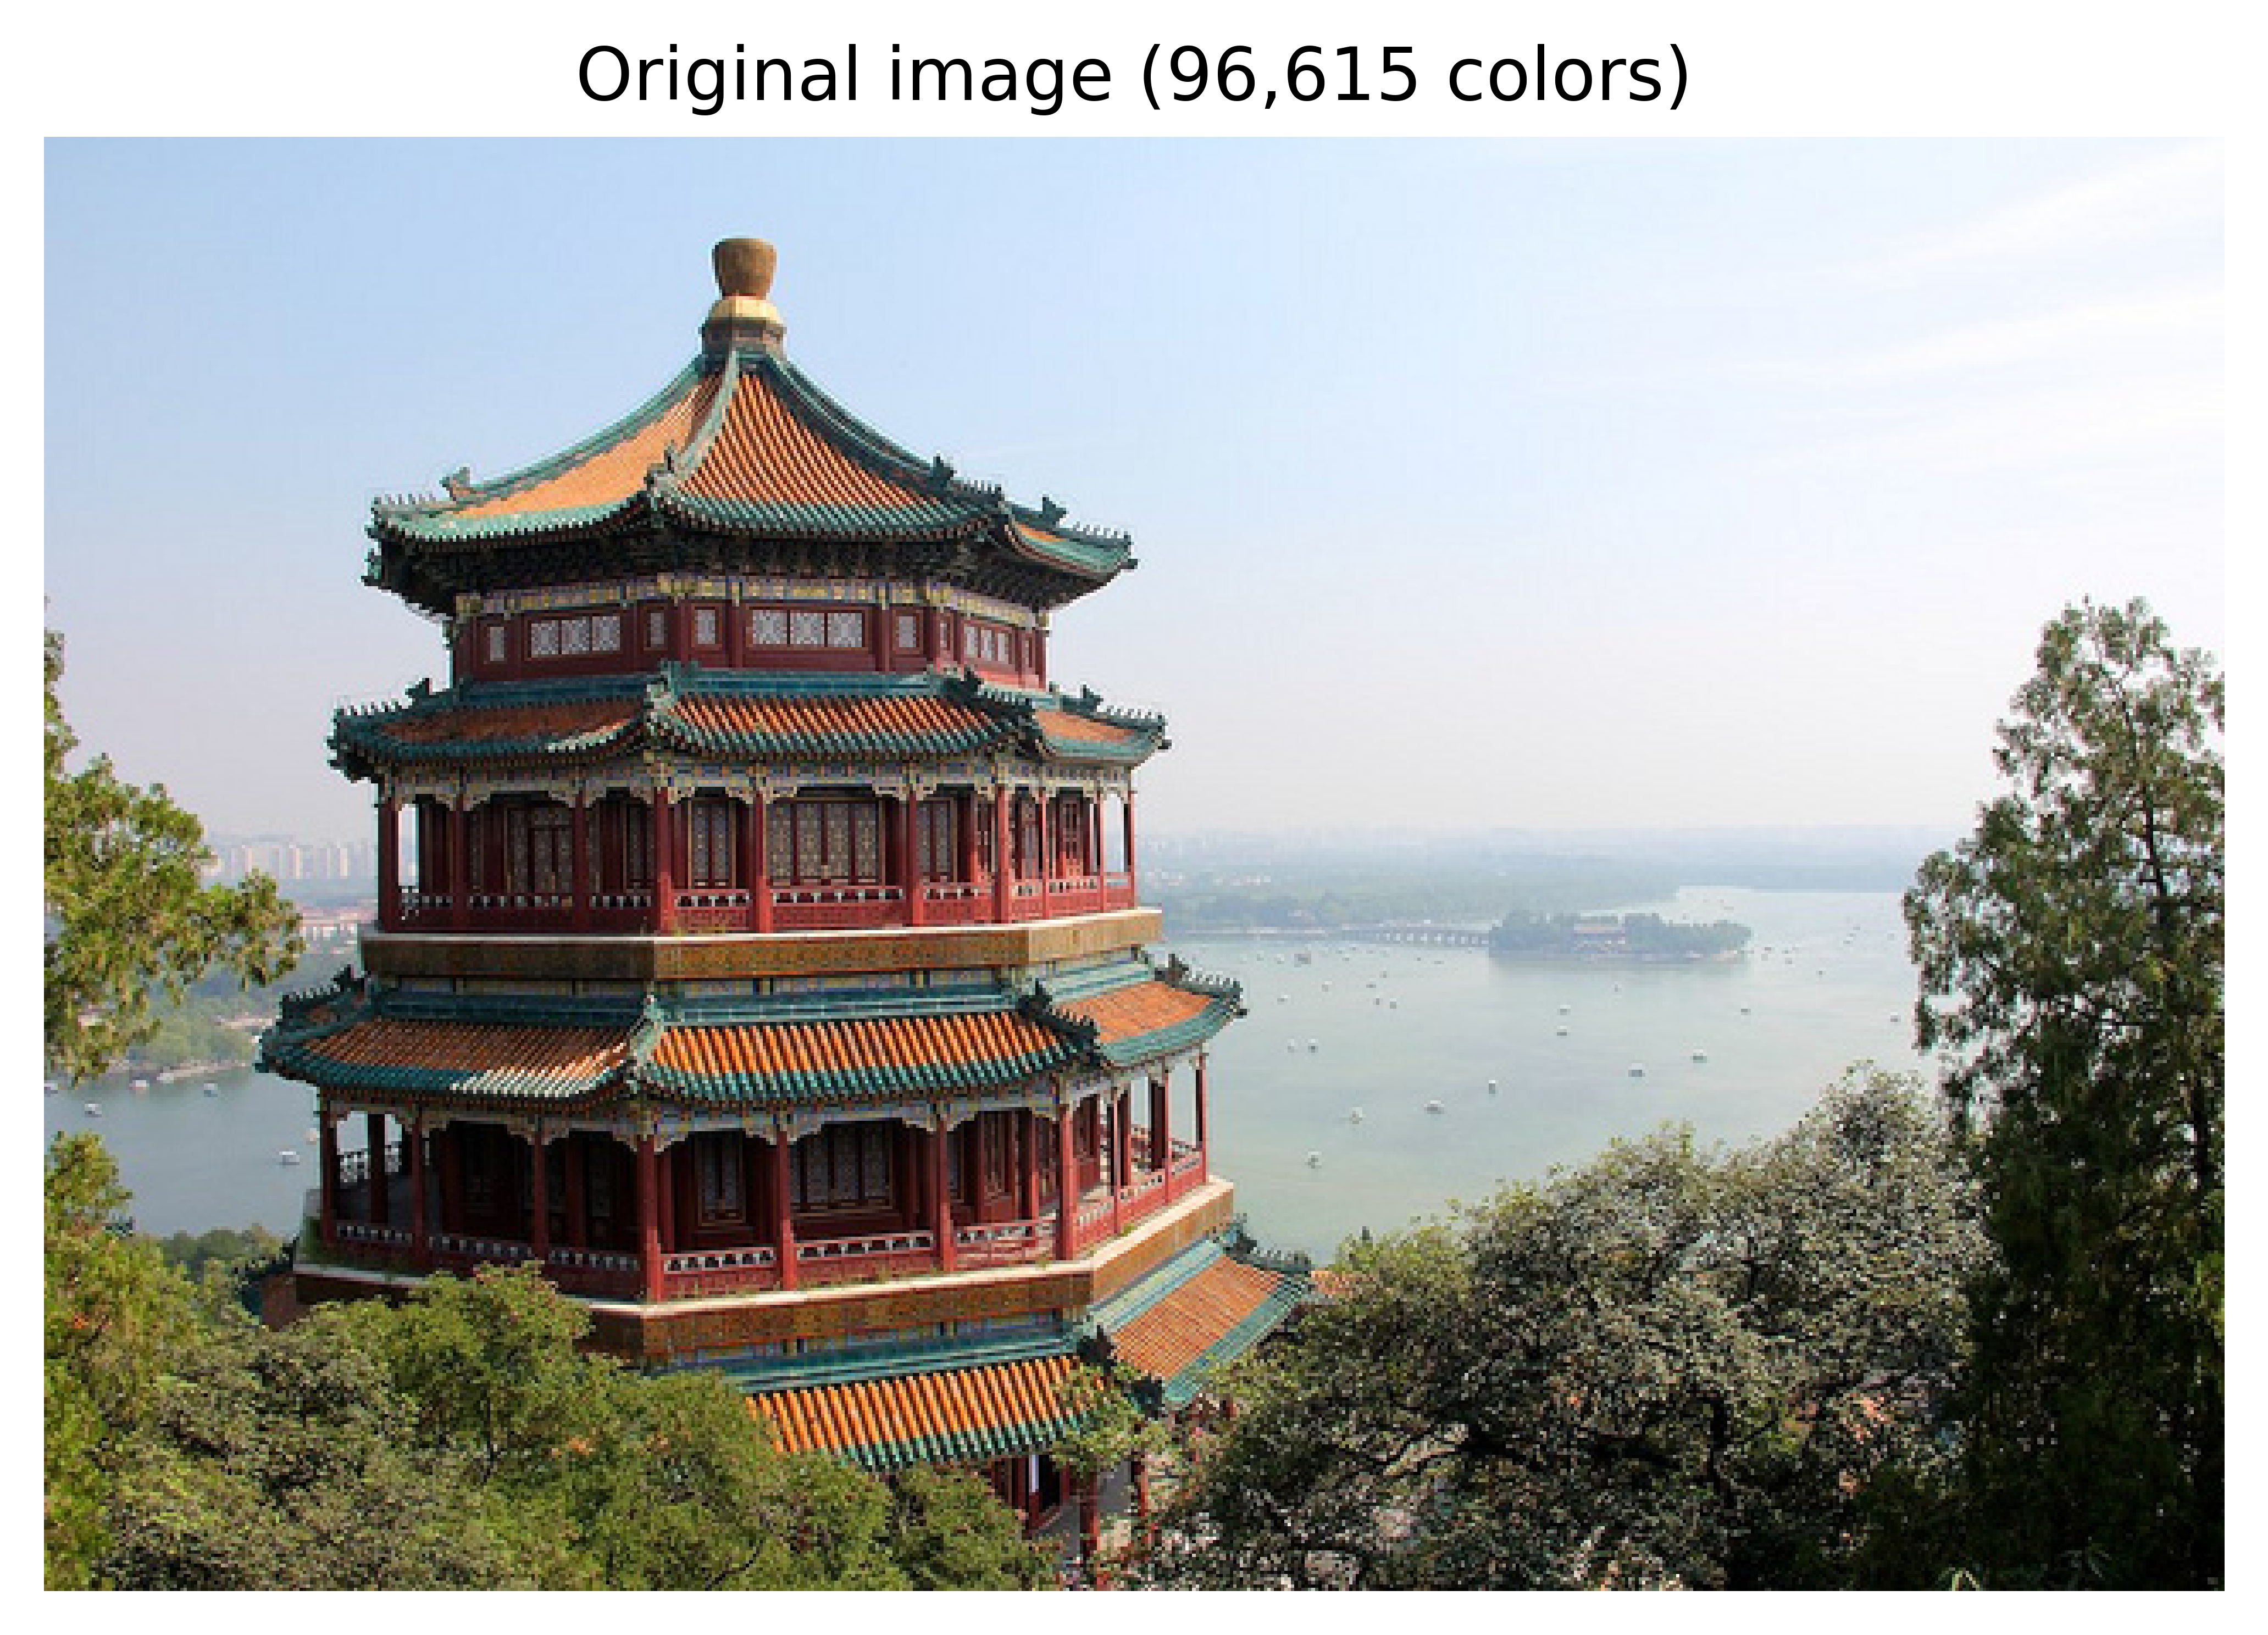

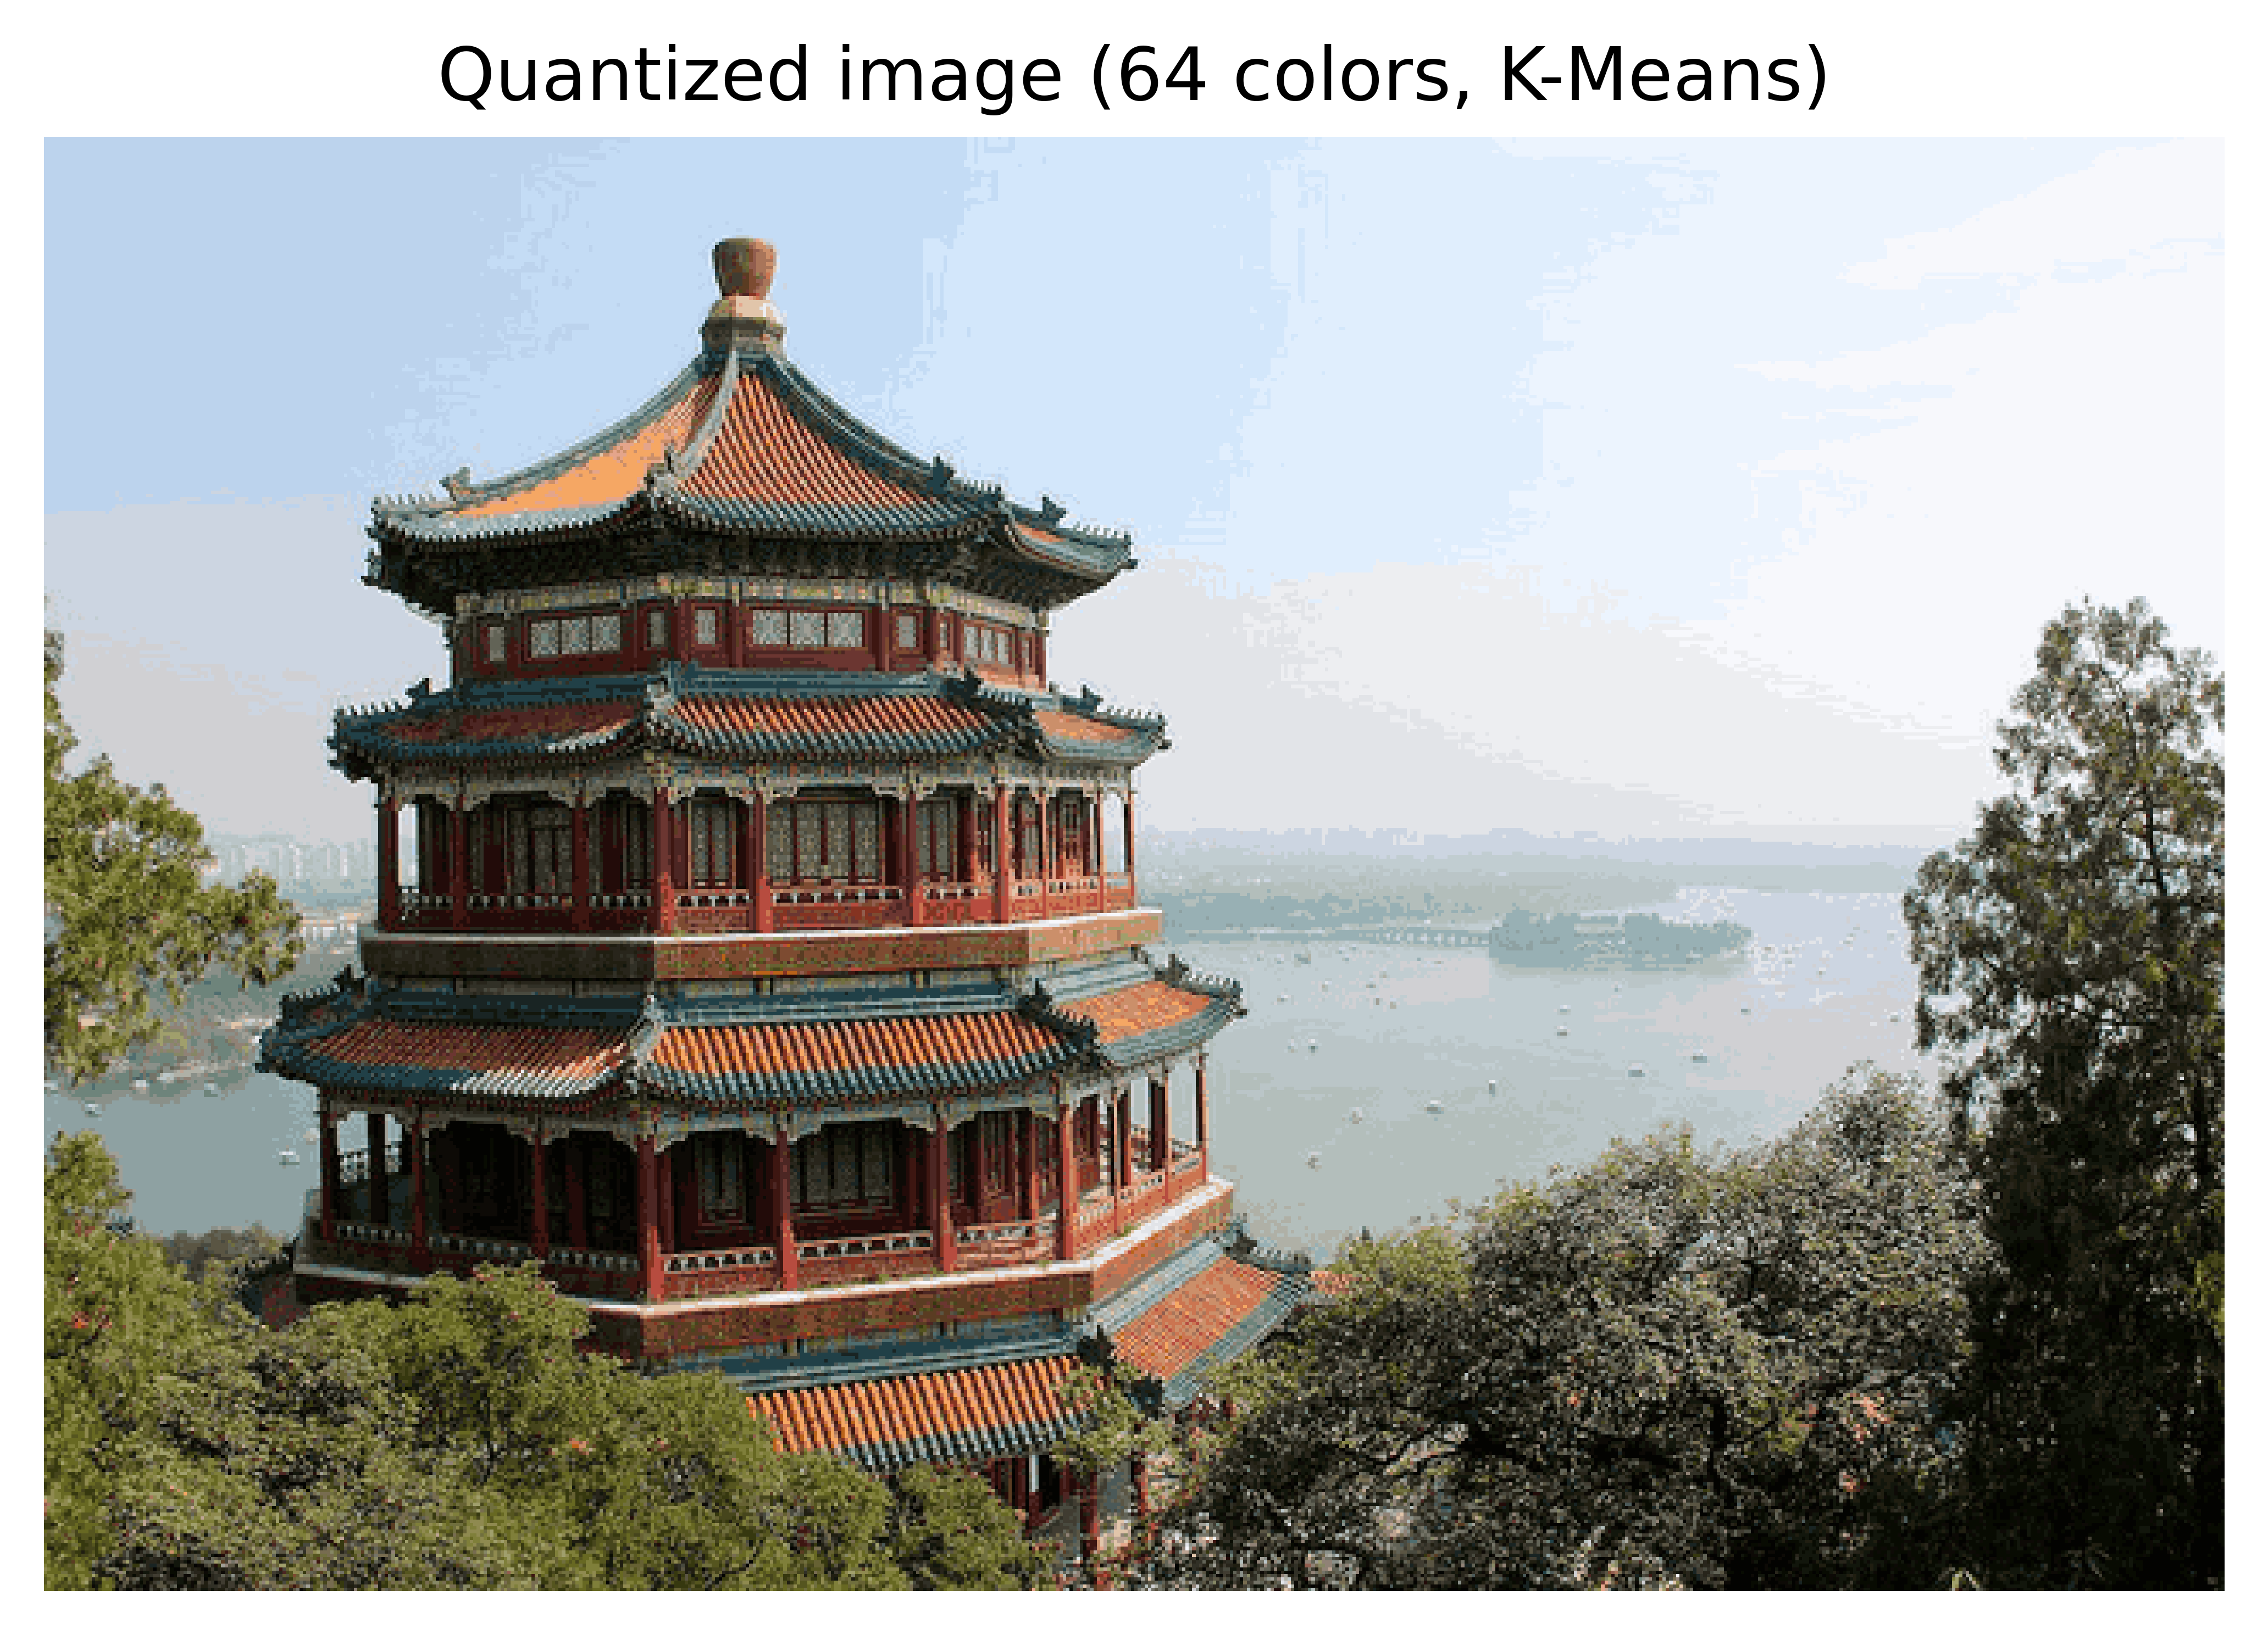

In [38]:
plt.figure(1, dpi=800)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(CHINA)

plt.figure(2, dpi=800)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({N_CLUSTERS} colors, K-Means)")
plt.imshow(compress_image(kmeans.cluster_centers_, labels, w, h, d))
plt.show()